In [12]:
from cobra.io import load_model
from cobra.sampling import sample
import scipy
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np

In [13]:
model = load_model("textbook")

In [14]:
for reaction in model.reactions:
    LB, UB = reaction.bounds
    if LB==-1000: LB = -30000
    if UB== 1000: UB = 30000
    reaction.bounds=(LB,UB)

In [15]:
s = pd.read_csv('sampled_flux_distributions.csv',index_col=0)
s2 = pd.read_csv('./results2/teraflux_ecolicore.fluxes.csv',index_col=0)
s2 = s2.T
logs2 = pd.read_csv('./results2/teraflux_ecolicore.log.tsv',sep="\t",index_col=0)

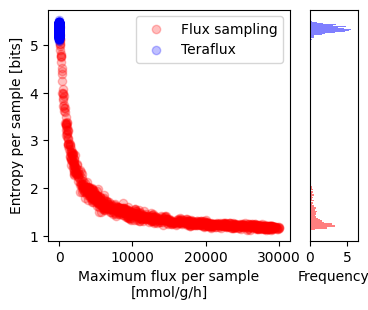

In [17]:
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax1 = plt.subplots(figsize=(4, 3/4*4))

# Scatterplot for Dataset 1
Hs1 = []
maxFluxes1 = []
for i in range(s.shape[0]):
    fluxes = s.loc[i].abs()
    p = fluxes / fluxes.sum()
    Hs1.append(scipy.stats.entropy(p,base=2))
    maxFluxes1.append(fluxes.max())
ax1.scatter(maxFluxes1, Hs1, alpha=0.25, label="Flux sampling", color='red')

# Scatterplot for Dataset 2
Hs2 = []
maxFluxes2 = []
for i in range(s2.shape[0]):
    fluxes = s2.iloc[i].abs()
    p = fluxes / fluxes.sum()
    Hs2.append(scipy.stats.entropy(p,base=2))
    maxFluxes2.append(fluxes.max())
ax1.scatter(maxFluxes2, Hs2, alpha=0.25, label="Teraflux", color='blue')


# Scatterplot customization
ax1.set_xlabel("Maximum flux per sample\n[mmol/g/h]")
ax1.set_ylabel("Entropy per sample [bits]")
ax1.legend()
#ax1.set_xlim([0,40])

# Create a new axis for the histograms outside the scatterplot
divider = make_axes_locatable(ax1)

# Right-side histogram for Hs
#ax_hist_right = divider.append_axes("right", size="20%", pad=0.2)
ax_hist_right = divider.append_axes("right", size="20%", pad=0.2, axes_class=type(ax1))
ax_hist_right.hist(Hs2, bins=30, orientation='horizontal', color='blue', alpha=0.5, label="Teraflux",density=True)
ax_hist_right.hist(Hs1, bins=150, orientation='horizontal', color='red', alpha=0.5, label="Flux sampling",density=True)
ax_hist_right.set_xlabel("Frequency")
ax_hist_right.yaxis.set_major_locator(MaxNLocator(integer=True))
ax_hist_right.yaxis.set_ticks([]) 

#plt.show()

plt.savefig("fig21.svg")

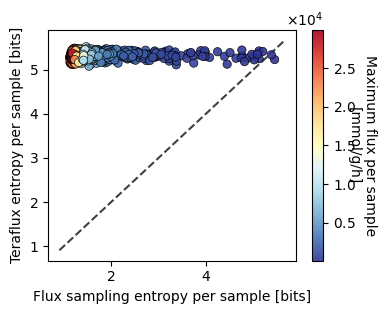

In [10]:
import matplotlib.ticker as mticker

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2)) # Set the range for when to use scientific notation


fig, ax = plt.subplots(figsize=(4, 3/4*4))
scatter=ax.scatter(Hs1,Hs2,c=maxFluxes1, cmap='RdYlBu_r', alpha=0.9, edgecolors='black', linewidth=0.5)
# Get the current axis limits
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# Plot the y=x line
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='y=x')
ax.set_ylabel("Teraflux entropy per sample [bits]")
ax.set_xlabel("Flux sampling entropy per sample [bits]")

# 4. Add the colorbar to show the mapping of values to colors
cbar = fig.colorbar(scatter, ax=ax)
cbar.ax.yaxis.set_major_formatter(formatter)
cbar.set_label('Maximum flux per sample\n[mmol/g/h]', rotation=270, labelpad=15)
plt.savefig("fig_ecore_map.svg")

In [24]:
reactions=["FUM","SUCDi","FRD7","SUCOAS","AKGDH","ICDHyr","ICL","MALS","ACONTa","CS","MDH"]
s.iloc[100][reactions].round(4)

FUM        8.7151
SUCDi     60.3525
FRD7      51.6374
SUCOAS    -7.0805
AKGDH      7.0805
ICDHyr     8.8443
ICL        1.8490
MALS       1.8490
ACONTa    10.6933
CS        10.6933
MDH        5.4215
Name: 100, dtype: float64

In [21]:
reactions=["R_FUM","R_SUCDi","R_FRD7","R_SUCOAS","R_AKGDH","R_ICDHyr","R_ICL","R_MALS","R_ACONTa","R_CS","R_MDH"]
s2.iloc[100][reactions].round(4)

R_FUM      -1.4957
R_SUCDi     0.0000
R_FRD7      1.4957
R_SUCOAS   -0.0348
R_AKGDH     0.0348
R_ICDHyr    1.2790
R_ICL       0.0438
R_MALS      0.0438
R_ACONTa    1.3227
R_CS        1.3227
R_MDH      -1.4519
Name: 100, dtype: float64